In [1]:
#1.Perform exploratory data analysis (EDA) to gain insights into the dataset. 
#Provide visualizations and summary statistics of the variables.

In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Dell\Desktop\D.S Assignment\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.shape

(1436, 11)

In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.isnull().sum()
# no missing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

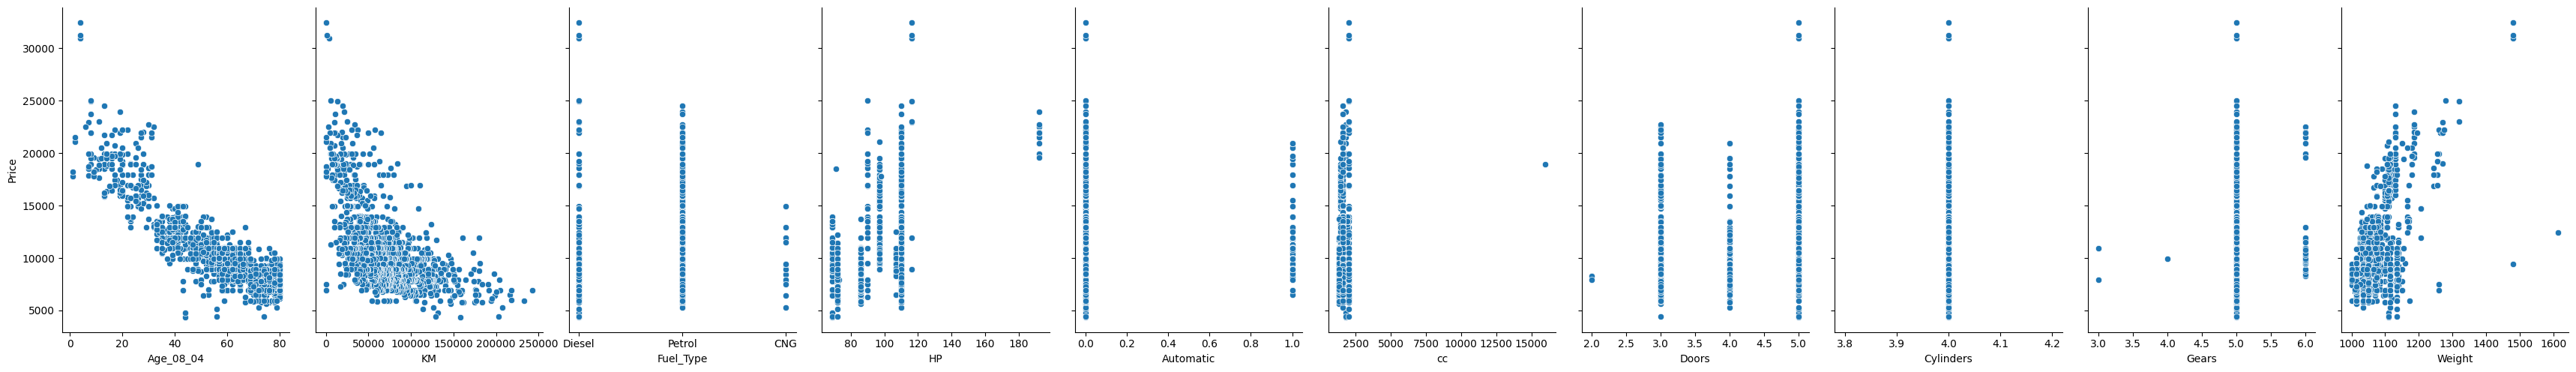

<Figure size 1500x2000 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,x_vars=[ 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],y_vars='Price',height=5,aspect=0.7)
plt.figure(figsize=(15, 20)) 
plt.show()

In [11]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [13]:
# define x and y varibles
# Handle categorical variables and normalization
categorical_features = ['Fuel_Type']
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight','Doors','Cylinders','Gears' ]

# One hot encoding for categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Standard scaling for numerical variables
numerical_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X = df.drop('Price', axis=1)
y = df['Price']

X_processed = preprocessor.fit_transform(X)


In [15]:
# One-hot encoding for FuelType
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Check for missing values
print(df.isnull().sum())

# Remove any rows with missing values (if any)
data = df.dropna()

# Display the first few rows to verify changes
print(data.head())

Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64
   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              True             False  
1    1165              True             False  
2    1165              True             False  
3    1165              True             False  
4    1170              Tru

In [16]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1148, 11) (288, 11) (1148,) (288,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Simple Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [22]:
# Coefficients
print("Model_1 Coefficients:", model_1.coef_)
print("Model_1 Intercept:", model_1.intercept_)

Model_1 Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  1.25055521e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Model_1 Intercept: -14255.385993565258


In [23]:
# Predictions
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [24]:

# Model performance
print("Model_1 Performance:")
print("R2-squared:", r2_score(y_test, y_pred_1))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_1))
print("Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_1)))

Model_1 Performance:
R2-squared: 0.8348888040611084
Mean Absolute Error: 990.8872739193923
Mean Squared Error: 1484.2654153296508


In [25]:
from sklearn.linear_model import Lasso, Ridge
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [26]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([11137.67629594,  8975.15418474,  9284.02484242,  8952.28991637,
       10082.69049398,  7959.25701942,  8657.02911345,  8255.37934865,
       14063.74039816, 13100.38573979,  9551.24346445,  9325.40377275,
       12919.53828906, 12925.54464596,  9793.51394373,  8305.60211681,
       12190.35304679, 17535.5343142 ,  7468.9364565 ,  9147.17979193,
       12638.94899489, 17804.38535545,  7903.72720335, 10386.39385478,
        7579.90588094, 16058.78858151, 10031.69736424,  7412.24425081,
       15765.50568921, 14441.01471558,  8164.14112424,  9610.42701753,
        8510.23274443, 10099.04215182, 10246.05408128,  8073.75509794,
        8759.90433262,  9966.26169055, 16471.07744   ,  9624.24726239,
        9830.40448747,  9503.89175636,  7888.42214393,  5697.41974422,
        6869.95843966, 17265.64019132,  9441.60369302, 10702.27882073,
        8748.44786281, 13429.6801589 , 12941.46822449,  6393.02048726,
       15071.05711388, 16374.1248971 ,  6193.73478668,  7783.16086303,
      

In [27]:
print("Lasso Performance:")
print("R2-squared:", r2_score(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Performance:
R2-squared: 0.8349467801805
Mean Absolute Error: 990.8940127223727
Mean Squared Error: 1484.0048045827486


In [28]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [29]:
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([11137.5353901 ,  8974.81976562,  9283.28478588,  8951.86625494,
       10082.30919076,  7959.00485682,  8656.41073331,  8255.01975937,
       14063.2834813 , 13100.01175111,  9551.01409917,  9325.07597269,
       12919.10688894, 12925.36681747,  9793.16199207,  8305.84521198,
       12190.17976969, 17535.03796315,  7468.54786292,  9146.75981355,
       12638.39926931, 17804.28135835,  7903.41967627, 10386.25760711,
        7580.10044535, 16058.74474945, 10033.50528232,  7411.85929986,
       15765.93549715, 14440.5649285 ,  8163.76566873,  9609.62369529,
        8509.81958494, 10098.63726631, 10245.65197401,  8073.43664207,
        8759.22918885,  9965.85900974, 16471.49229792,  9623.84315344,
        9830.01338121,  9503.50390762,  7888.01608939,  5697.66068962,
        6870.22154385, 17265.72457978,  9441.20995315, 10701.87622856,
        8748.68989893, 13429.30767927, 12941.08619726,  6393.29814822,
       15071.48322604, 16374.39180958,  6193.98039751,  7782.74810525,
      

In [30]:
print("Ridge Performance:")
print("R2-squared:", r2_score(y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Performance:
R2-squared: 0.8349121559240105
Mean Absolute Error: 990.870125029498
Mean Squared Error: 1484.1604509512745
